In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import statsmodels.api as sm
import pylab
import datetime
#from datetime import datetime
from scipy import stats

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mydata/DSI_kickstarterscrape_dataset.csv


In [2]:
#dateparse = lambda x: datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f")
#df = pd.read_csv(r'../input/mydata/DSI_kickstarterscrape_dataset.csv',parse_dates=['funded date'], date_parser=dateparse, encoding='latin1')

In [3]:
df = pd.read_csv(r'../input/mydata/DSI_kickstarterscrape_dataset.csv', encoding='latin1')
df

,project id,name,url,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,2147336747,The Dance Project,http://www.kickstarter.com/projects/685772205/...,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83
45953,2147346811,new album from J-Sw!ft The Adventures of Negro...,http://www.kickstarter.com/projects/170926480/...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96
45954,2147367534,ELIZABETH REX,http://www.kickstarter.com/projects/elizabethr...,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32
45955,2147369705,Dragon Keepers IV Book Project,http://www.kickstarter.com/projects/brucegoldw...,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00


In [4]:
df.drop(['project id', 'url'], axis=1, inplace=True)
df

,name,category,subcategory,location,status,goal,pledged,funded percentage,backers,funded date,levels,reward levels,updates,comments,duration
0,WHILE THE TREES SLEEP,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00
1,Educational Online Trading Card Game,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18
2,STRUM,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00
3,GETTING OVER - One son's search to finally kno...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22
4,The Launch of FlyeGrlRoyalty &quot;The New Nam...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45952,The Dance Project,Dance,Dance,"Austin, TX",successful,500.0,601.0,1.202000,13,"Fri, 30 Mar 2012 13:57:00 -0000",3,"$20,$50,$100",2,0,37.83
45953,new album from J-Sw!ft The Adventures of Negro...,Music,Hip-Hop,"Los Angeles, CA",failed,10000.0,75.0,0.007500,2,"Sun, 22 Apr 2012 02:12:10 -0000",14,"$1,$5,$10,$25,$50,$50,$75,$100,$200,$250,$500,...",1,1,59.96
45954,ELIZABETH REX,Music,Rock,"Los Angeles, CA",successful,10000.0,10000.0,1.000000,58,"Mon, 16 Jan 2012 05:00:00 -0000",4,"$10,$25,$100,$500",2,0,27.32
45955,Dragon Keepers IV Book Project,Publishing,Fiction,"Vero Beach, FL",failed,2999.0,257.0,0.085695,11,"Sat, 19 May 2012 19:44:47 -0000",7,"$15,$16,$19,$29,$29,$39,$75",17,0,30.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               45957 non-null  object 
 1   category           45957 non-null  object 
 2   subcategory        45957 non-null  object 
 3   location           44635 non-null  object 
 4   status             45957 non-null  object 
 5   goal               45957 non-null  float64
 6   pledged            45945 non-null  float64
 7   funded percentage  45957 non-null  float64
 8   backers            45957 non-null  int64  
 9   funded date        45957 non-null  object 
 10  levels             45957 non-null  int64  
 11  reward levels      45898 non-null  object 
 12  updates            45957 non-null  int64  
 13  comments           45957 non-null  int64  
 14  duration           45957 non-null  float64
dtypes: float64(4), int64(4), object(7)
memory usage: 5.3+ MB


In [6]:
df.isnull().sum()

name                    0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

In [7]:
df.describe()

,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


# What is the mean (total) pledge that projects get? (not per backer) ?
## *4,980.750*

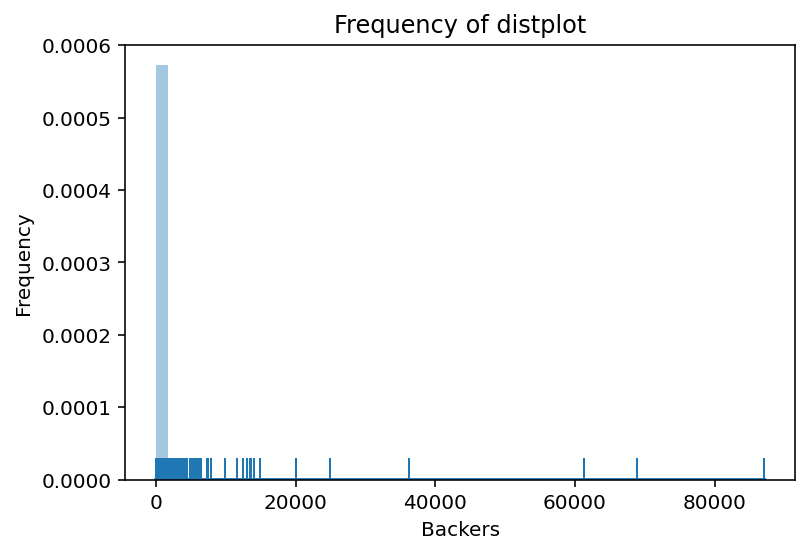

In [8]:
sns.distplot(df['backers'], kde=True, rug = True)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Frequency of distplot')
plt.show()

# Create a histogram that shows the distribution for number of backers. What is the skew of the distribution?
## *Positive Skewness*

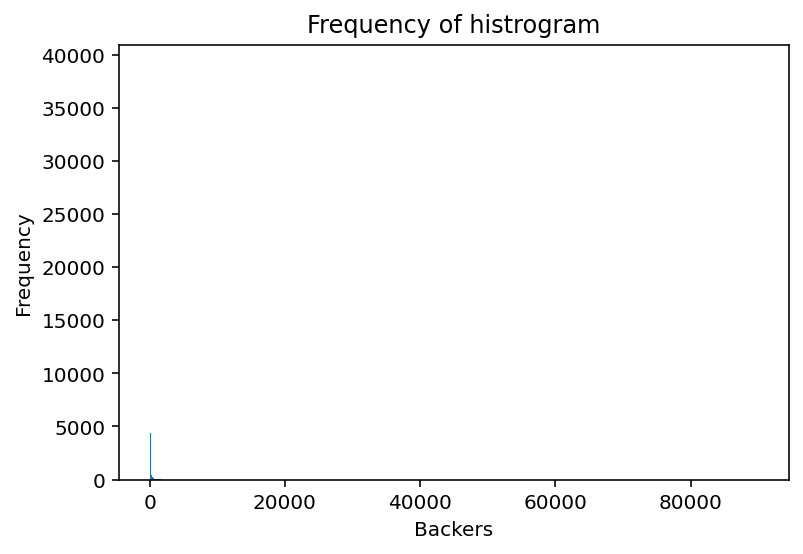

In [9]:
bins = np.linspace(0,90000,1000).astype(int)
plt.hist(df['backers'], bins = bins)
plt.xlabel('Backers')
plt.ylabel('Frequency')
plt.title('Frequency of histrogram')
plt.show()

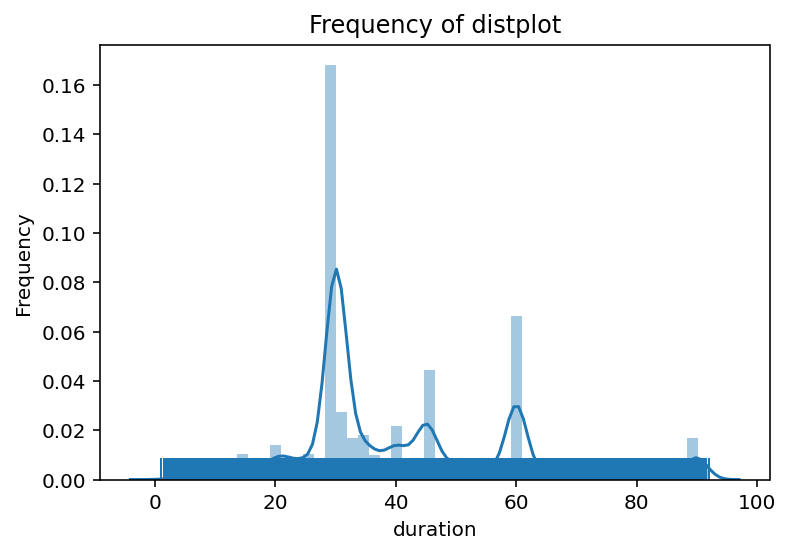

In [10]:
sns.distplot(df['duration'], kde=True, rug = True)
plt.xlabel('duration')
plt.ylabel('Frequency')
plt.title('Frequency of distplot')
plt.show()

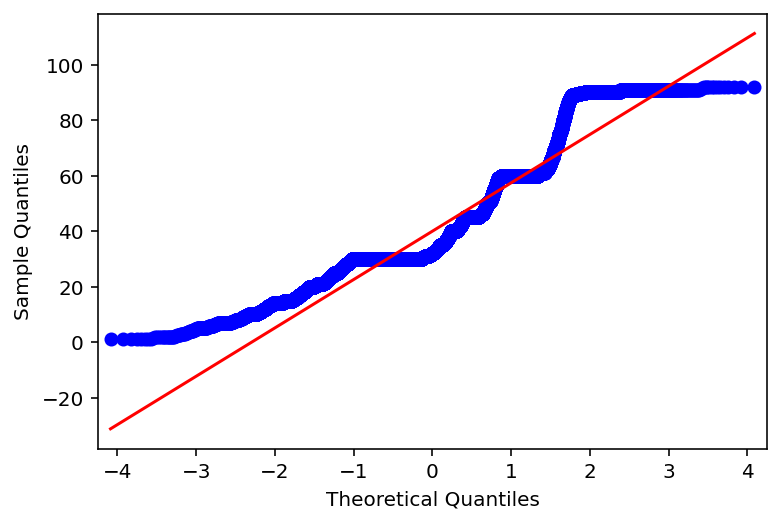

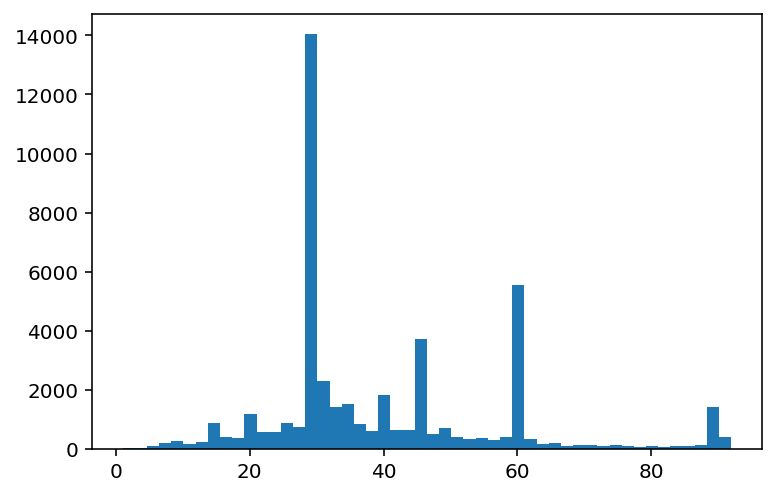

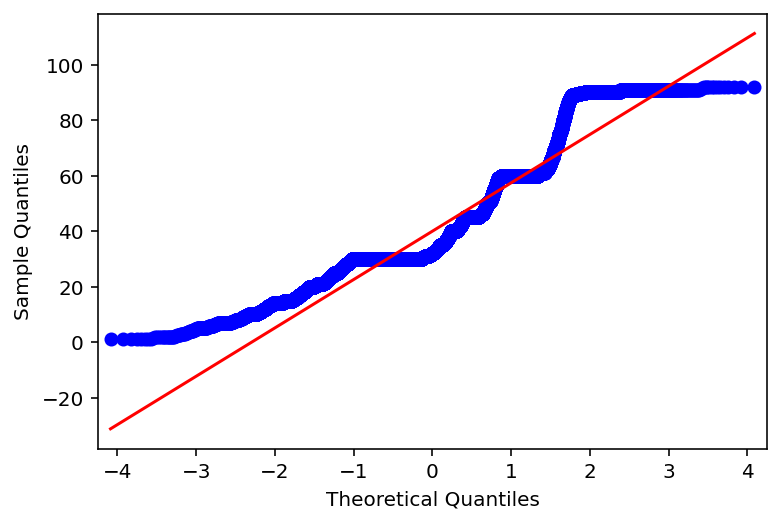

In [11]:
plt.hist(df['duration'], bins=50)
sm.qqplot(df['duration'], line='s')

# Is the ‘duration’ variable normally distributed? *
## *No* 

# Remove the outlier using Z_score
For such distributions it is always the case that 68% of values are less than one standard deviation (1SD) away from the mean value, that 95% of values are less than two standard deviations (2SD) away from the mean and that 99% of values are less than three standard deviations (3SD) away from the mean.

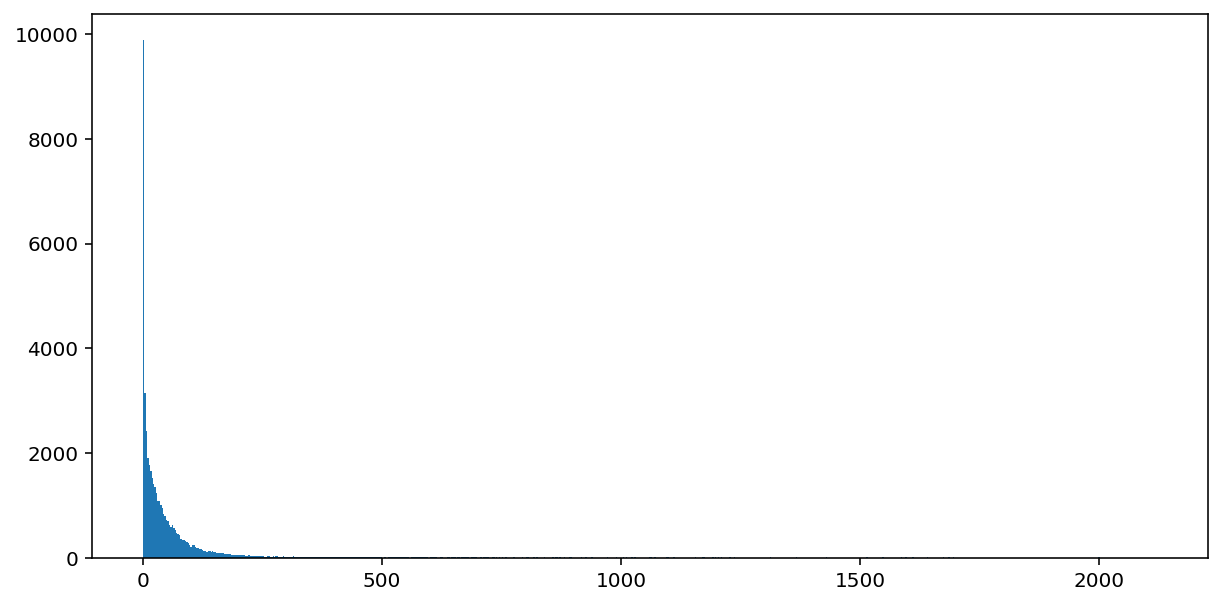

backers has value between 0 and 2,122
New data shape is (45866, 15)


In [12]:
z_score = stats.zscore(df['backers'])
df_clean = df[np.abs(z_score) < 3]

plt.figure(figsize=(10, 5))
plt.hist(df_clean['backers'], bins='auto')
plt.show()
print("backers has value between {:,} and {:,}".format(df_clean['backers'].min(),df_clean['backers'].max()))
print(f'New data shape is {df_clean.shape}')

In [13]:
df_clean[df_clean.backers == 0].pledged.sum()

1.0

In [14]:
df_clean['pledged_per_backer'] = df_clean.pledged.div(df_clean.backers, axis=0).apply(np.ceil)
df_clean['pledged_per_backer'] = df_clean['pledged_per_backer'].replace([np.inf, -np.inf], np.nan)
df_clean['pledged_per_backer'].fillna(0, inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45866 entries, 0 to 45956
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                45866 non-null  object 
 1   category            45866 non-null  object 
 2   subcategory         45866 non-null  object 
 3   location            44544 non-null  object 
 4   status              45866 non-null  object 
 5   goal                45866 non-null  float64
 6   pledged             45858 non-null  float64
 7   funded percentage   45866 non-null  float64
 8   backers             45866 non-null  int64  
 9   funded date         45866 non-null  object 
 10  levels              45866 non-null  int64  
 11  reward levels       45807 non-null  object 
 12  updates             45866 non-null  int64  
 13  comments            45866 non-null  int64  
 14  duration            45866 non-null  float64
 15  pledged_per_backer  45866 non-null  float64
dtypes: f

In [16]:
df_clean[['pledged', 'backers', 'pledged_per_backer']]

,pledged,backers,pledged_per_backer
0,11545.0,66,175.0
1,20.0,2,10.0
2,56.0,3,19.0
3,6535.0,100,66.0
4,0.0,0,0.0
...,...,...,...
45952,601.0,13,47.0
45953,75.0,2,38.0
45954,10000.0,58,173.0
45955,257.0,11,24.0


In [17]:
#d = datetime.strptime(df['funded date'], "%a %d %b %Y %H:%M:%S.%f")

In [18]:
df_clean['year of funded'] = df_clean['funded date'].apply(lambda x: datetime.datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f").strftime('%Y'))
df_clean['month of funded'] = df_clean['funded date'].apply(lambda x: datetime.datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f").strftime('%b'))
df_clean['date of funded'] = df_clean['funded date'].apply(lambda x: datetime.datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f").strftime('%d'))
df_clean['day of funded'] = df_clean['funded date'].apply(lambda x: datetime.datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f").strftime('%a'))
df_clean['hour of funded'] = df_clean['funded date'].apply(lambda x: datetime.datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f").strftime('%H'))
df_clean['minute of funded'] = df_clean['funded date'].apply(lambda x: datetime.datetime.strptime(x, "%a, %d %b %Y %H:%M:%S -%f").strftime('%M'))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

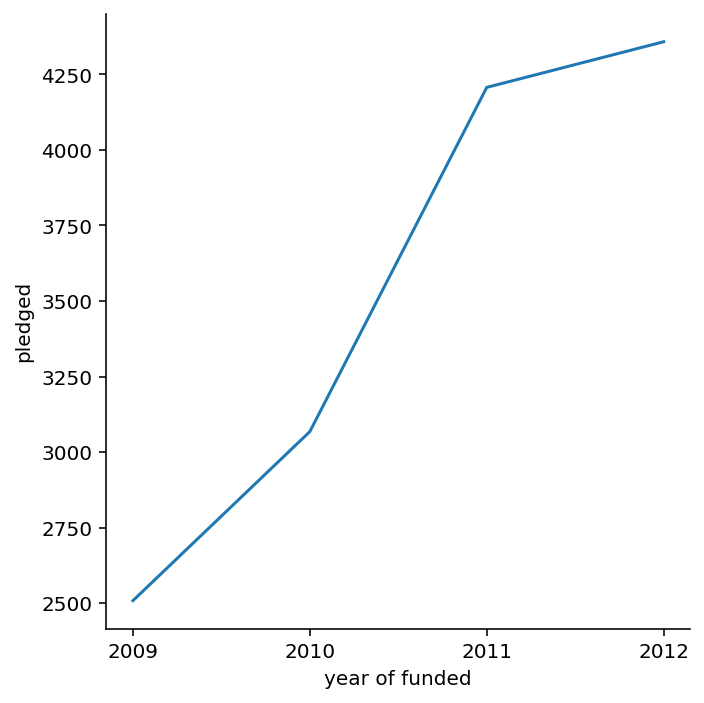

In [19]:
sns.relplot(x="year of funded", y="pledged",ci=None, kind="line", data=df_clean);

In [ ]:
sns.regplot(x="duration", y="backers", data=df_clean);

In [ ]:
sns.regplot(x="duration", y="pledged", data=df_clean);

In [ ]:
df_clean['zscore'] = (df_clean.pledged - df_clean.pledged.mean())/df_clean.pledged.std(ddof=0)
df_clean[['zscore']]
#df_clean['z_score']=stats.zscore(df_clean['pledged'],axis=0, ddof=1)
#df_clean[['z_score']]
df_clean= df_clean.loc[df_clean['zscore'].abs()<=3]

In [ ]:
sns.regplot(x="duration", y="pledged", data=df_clean);
print("pledged has value between {:,} and {:,}".format(df_clean['pledged'].min(),df_clean['pledged'].max()))
print(f'New data shape is {df_clean.shape}')

In [ ]:
df_clean.describe()

In [ ]:
bin_duration = np.linspace(0,100,11)
bin_duration

In [ ]:
df_clean['bin_duration'] = pd.cut(df_clean['duration'], bin_duration)
g1 = sns.catplot(x="bin_duration", y="pledged", kind="box", data=df_clean);
g1.fig.set_figwidth(15);
g1.fig.set_figheight(5);

In [ ]:
df_clean['bin_duration'] = pd.cut(df_clean['duration'], bin_duration)
g1 = sns.catplot(x="bin_duration", y="pledged_per_backer", kind="box", data=df_clean);
g1.fig.set_figwidth(15);
g1.fig.set_figheight(5);

In [ ]:
#Plot bin_duraiton using +-3SD
df_clean['zscore1'] = (df_clean.pledged_per_backer - df_clean.pledged_per_backer.mean())/df_clean.pledged_per_backer.std(ddof=0)
df_clean[['zscore1']]
df_clean1= df_clean.loc[df_clean['zscore1'].abs()<=3]
#Plot graph
df_clean1['bin_duration'] = pd.cut(df_clean1['duration'], bin_duration)
g = sns.catplot(x="bin_duration", y="pledged_per_backer", kind="box", data=df_clean1);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);

In [ ]:
df_clean.groupby(['bin_duration'])['backers'].mean().sort_values().plot(kind = 'barh');

In [ ]:
df_clean.groupby(['bin_duration'])['pledged'].mean().sort_values().plot(kind = 'barh');

In [ ]:
df_clean.groupby(['bin_duration'])['pledged_per_backer'].mean().sort_values().plot(kind = 'barh');

In [ ]:
#df_clean.groupby('status').get_group('successful')

In [ ]:
#df_clean[df_clean['status'] == 'successful']

In [ ]:
g2 = sns.catplot(x="bin_duration", kind="count", palette="ch:.25", data=df_clean);
g2.fig.set_figwidth(15);
g2.fig.set_figheight(5);

In [ ]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df_clean, title="Profiling Report")

In [ ]:
#df_clean.profile_report()

In [ ]:
#profile.to_widgets()

In [ ]:
#profile.to_notebook_iframe()